<a href="https://colab.research.google.com/github/TheSeems/HseNotebooks/blob/main/Akhundov_algebra_13_2021_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sympy
from sympy import Eq, S, latex, plot_implicit, Matrix, symbols, simplify, expand, collect, solve, solveset
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
%matplotlib inline

# Занятие 13
# Алгебра
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [6]:
x, y, z = symbols('x y z')

u = 7*x**2 + 10*sympy.sqrt(3)*x*y - 3*y**2 - 20*z**2
A = Matrix([
  [7,  10*sympy.sqrt(3)/2, 0],
  [10*sympy.sqrt(3)/2, -3, 0],
  [0, 0, -20]
])

X = Matrix([x, y, z])
res = simplify(expand(X.T*A*X))

display(*res)
display(res[0] - u == 0)

7*x**2 + 10*sqrt(3)*x*y - 3*y**2 - 20*z**2

True

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [7]:
def to_canon(A):
  ev = A.eigenvects()
  P = Matrix([])
  for item in ev:
    degree = item[1]
    for i in range(degree):
      e_i = item[2][i]
      P = P.row_join(e_i.normalized())

  return sympy.simplify(P.T * A * P)

def expand_quad(A, X = Matrix([x, y, z])):
  return collect(simplify(expand(X.T * A * X)[0]), list(X))

canon = to_canon(A)
display(expand_quad(canon))

-20*x**2 - 8*y**2 + 12*z**2

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

True


Matrix([
[  X + sqrt(2)/2],
[Y + 3*sqrt(2)/2],
[              1]])

25*X**2 + 169*Y**2 - 4225

Eq(x**2/169 + y**2/25, 1)

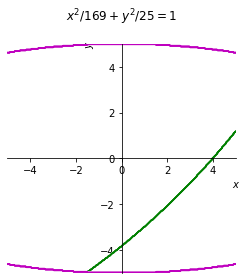

In [11]:
A = Matrix([
            [97, S(-144) / 2, S(482) / 2],
            [S(-144) / 2, 97, S(-532) / 2],
            [S(482) / 2, S(-532) / 2, -3452]
])

Xt = Matrix([x, y, 1])
u = 97*x**2 - 144*x*y + 97*y**2 + 482*x - 532*y - 3452
test = simplify(expand(Xt.transpose() * A * Xt))[0]

print(test - u == 0)

alpha = sympy.acot((A[0, 0] - A[1, 1])/(2*A[0, 1]))/2
P = Matrix([[Cos(alpha), -Sin(alpha), 0], [Sin(alpha), Cos(alpha), 0], [0, 0, 1]])

A = simplify(expand((P.transpose() * A * P)))

from sympy.abc import X, Y, Z
Xt = Matrix((X, Y, 1))
simplify(expand((Xt.T*A*Xt)[0]))

X3_new = Matrix((X - A[0, 2]/A[0, 0], Y - A[1, 2]/A[1, 1], 1))
eq3_new = simplify(expand(X3_new.T*A*X3_new))[0]
display(X3_new, eq3_new)

free = eq3_new.subs({X: 0, Y: 0})
eq3_last = eq3_new/(-free) + 1

eq3_last_xy = Eq(eq3_last.subs({X: x, Y: y}), 1)
display(eq3_last_xy)

# Получаем эллипс

p = plot_implicit(u, line_color='g', aspect_ratio=(1, 1), xlabel='$x$', ylabel='$y$',
 title=latex(eq3_last_xy, mode='inline') + '\n', adaptive=False, show=False)
p.extend(plot_implicit(eq3_last_xy, line_color='m', aspect_ratio=(1, 1), adaptive=False, show=False))
p.show()


### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

True


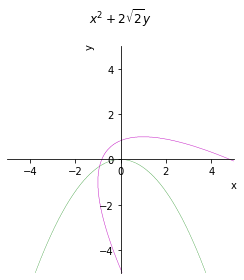

In [23]:
u = x**2 + 2*x*y + y**2 - 4*x + 4*y - 4

A = Matrix([
    [1, 1, -2],
    [1, 1, 2],
    [-2, 2, -4],
])

X = Matrix([x, y, 1])
test = simplify(expand(X.transpose() * A * X))[0]
print(test - u == 0)

ang = sympy.acot((A[0,0] - A[1,1]) / (2 * A[0,1])) / 2
T = Matrix([
        [sympy.cos(ang), -sympy.sin(ang), 0],
        [sympy.sin(ang), sympy.cos(ang), 0],
        [0, 0, 1],
    ])

A = T.inv() * A * T
x1, y1 = symbols("x1 y1")
quad = expand_quad(A, X) / 2 + 2

p = plot_implicit(quad, line_color='g', aspect_ratio=(1,1), title=latex(quad, mode='inline')+'\n', show=False)
p.extend(plot_implicit(
    u,
    line_color='m',
    show=False
))
p.show()


###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

$$Q = - 667 x^{2} + 136 \sqrt{6} x y - 1066 \sqrt{3} x z - 632 y^{2} - 408 \sqrt{2} y z + 399 z^{2}$$

In [41]:
u = -667*x**2 + 136*sympy.sqrt(6) * x*y - 1066 * sympy.sqrt(3) * x * z - 632 * y**2 - 408 * sympy.sqrt(2) * y*z + 399 * z**2
a = 136*sympy.sqrt(6)
b = -1066 * sympy.sqrt(3)
c = -408 * sympy.sqrt(2)

x, y, z = symbols("x y z")
X = Matrix([x, y, z])

A = Matrix([
            [-667, a/2, b/2],
            [a/2, -632, c/2],
            [b/2, c/2, 399]
])

# Source
display(A)
A = to_canon(A)

# Canonical
display(A)
display(expand_quad(A))

Matrix([
[        -667,   68*sqrt(6), -533*sqrt(3)],
[  68*sqrt(6),         -632, -204*sqrt(2)],
[-533*sqrt(3), -204*sqrt(2),          399]])

Matrix([
[-1200,    0,    0],
[    0, -700,    0],
[    0,    0, 1000]])

-1200*x**2 - 700*y**2 + 1000*z**2